In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import connection as con
from ETL import extract as ex

In [5]:
conn_dw_worldcup = con.connect_dw_world_cup()

In [6]:
dw_event = ex.extract_table("Event", conn_dw_worldcup)
dw_team = ex.extract_table("Team", conn_dw_worldcup)
dw_site = ex.extract_table("Site", conn_dw_worldcup)
dw_state = ex.extract_table("State", conn_dw_worldcup)
dw_game = ex.extract_table("Game", conn_dw_worldcup)

# Día que más se jugó

In [32]:
most_played_game = pd.merge(dw_event, dw_game, left_on='Game_idGame', right_on='idGame', how='inner')['Day'].value_counts().reset_index()
most_played_game['count'] = most_played_game['count'].astype(int)
most_played_game

,Day,count
0,Sunday,392
1,Saturday,304
2,Wednesday,296
3,Tuesday,238
4,Thursday,222
5,Friday,184
6,Monday,164


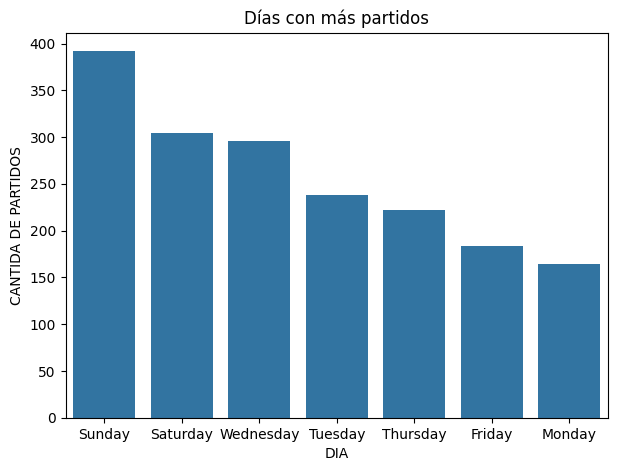

In [37]:
plt.figure(figsize=(7, 5))
sns.barplot(most_played_game,x = 'Day',y = 'count')
plt.xlabel('DIA')
plt.ylabel('CANTIDA DE PARTIDOS')
plt.title('Días con más partidos')
plt.show()

# Grupo con más goles

In [18]:
most_goals_group = pd.merge(dw_event, dw_game, left_on='Game_idGame', right_on='idGame', how='inner')
most_goals_group['Score'] = most_goals_group['Score'].astype(int)
most_goals_group = most_goals_group.groupby('Stage')['Score'].sum().reset_index()#['Stage'].value_counts().reset_index()
most_goals_group = most_goals_group.sort_values(by = 'Score', ascending = False)
most_goals_group


,Stage,Score
3,Group B,371
2,Group A,351
5,Group D,314
4,Group C,289
11,Round of 16,275
10,Quarterfinals,186
6,Group E,144
7,Group F,132
12,Semifinals,127
8,Group G,93


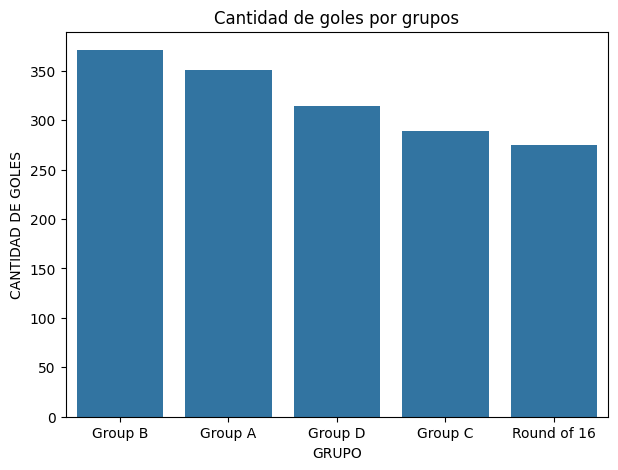

In [19]:
plt.figure(figsize=(7, 5))
sns.barplot(most_goals_group.head(5),x = 'Stage',y = 'Score')
plt.xlabel('GRUPO')
plt.ylabel('CANTIDAD DE GOLES')
plt.title('Cantidad de goles por grupos')
plt.show()

# Mudial con más goles

In [22]:
most_goals_cup = pd.merge(dw_event, dw_site, left_on='Site_idSite', right_on='idSite', how='inner')
most_goals_cup['Score'] = most_goals_cup['Score'].astype(int)
most_goals_cup = most_goals_cup.groupby('Year')['Score'].sum().reset_index()#['Stage'].value_counts().reset_index()
most_goals_cup = most_goals_cup.sort_values(by = 'Score', ascending = False)
most_goals_cup

,Year,Score
19,2014,171
15,1998,171
20,2018,169
16,2002,161
17,2006,147
11,1982,146
18,2010,145
14,1994,141
4,1954,140
12,1986,132


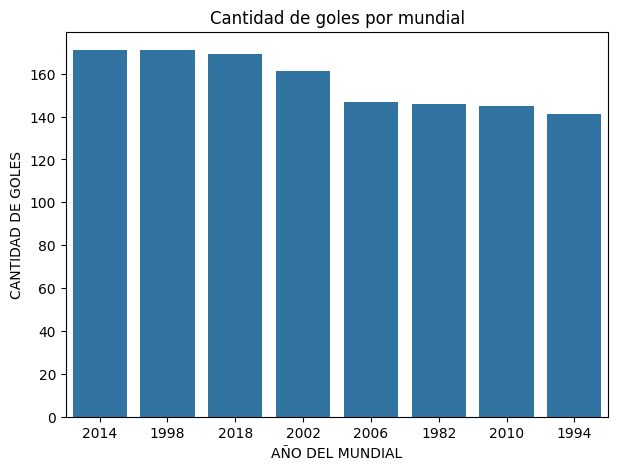

In [25]:
plt.figure(figsize=(7, 5))
sns.barplot(most_goals_cup.head(8),x = 'Year',y = 'Score')
plt.xlabel('AÑO DEL MUNDIAL')
plt.ylabel('CANTIDAD DE GOLES')
plt.title('Cantidad de goles por mundial')
plt.show()

# Cantidad de victorias dependiendo de la localidad

In [7]:
winner_team = pd.merge(dw_event, dw_state, left_on='State_idState', right_on='idState', how='inner')
winner_team = pd.merge(winner_team, dw_team, left_on='Team_idTeam', right_on='idTeam', how='inner')
winner_team = winner_team[winner_team['State'] == 'W']['Name'].value_counts().reset_index()
winner_team

,Name,count
0,Brazil,76
1,Argentina,47
2,Italy,46
3,West Germany,39
4,France,36
...,...,...
60,FR Yugoslavia,1
61,Bosnia and Herzegovina,1
62,Slovakia,1
63,Wales,1


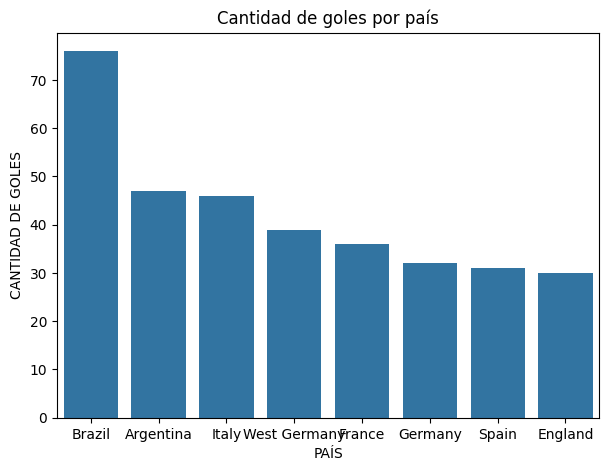

In [8]:
plt.figure(figsize=(7, 5))
sns.barplot(winner_team.head(8),x = 'Name',y = 'count')
plt.xlabel('PAÍS')
plt.ylabel('CANTIDAD DE GOLES')
plt.title('Cantidad de goles por país')
plt.show()

# País con más partidos

In [10]:
games_team = pd.merge(dw_event, dw_team, left_on='Team_idTeam', right_on='idTeam', how='inner')['Name'].value_counts().reset_index()
games_team

,Name,count
0,Brazil,109
1,Italy,83
2,Argentina,81
3,England,69
4,France,66
...,...,...
79,Iraq,3
80,Israel,3
81,Iceland,3
82,Angola,3


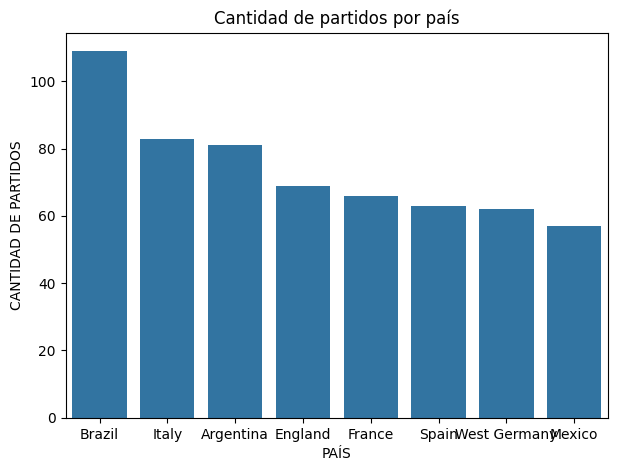

In [11]:
plt.figure(figsize=(7, 5))
sns.barplot(games_team.head(8),x = 'Name',y = 'count')
plt.xlabel('PAÍS')
plt.ylabel('CANTIDAD DE PARTIDOS')
plt.title('Cantidad de partidos por país')
plt.show()